In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
hsd = pd.read_csv('data.csv')
hsd

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
hsd.shape

(4600, 18)

In [15]:
hsd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4551 non-null   datetime64[ns]
 1   year           4551 non-null   int64         
 2   price          4551 non-null   float64       
 3   bedrooms       4551 non-null   int64         
 4   bathrooms      4551 non-null   float64       
 5   sqft_living    4551 non-null   int64         
 6   sqft_lot       4551 non-null   int64         
 7   floors         4551 non-null   int64         
 8   waterfront     4551 non-null   int64         
 9   view           4551 non-null   int64         
 10  condition      4551 non-null   int64         
 11  sqft_above     4551 non-null   int64         
 12  sqft_basement  4551 non-null   int64         
 13  yr_built       4551 non-null   int64         
 14  yr_renovated   4551 non-null   int64         
 15  street         4551 n

In [4]:
hsd['date'] = pd.to_datetime(hsd['date'])

In [5]:
hsd['price']     = hsd['price'].astype('int64')
hsd['bedrooms']  = hsd['bedrooms'].astype('int64')
hsd['floors']    = hsd['floors'].astype('int64')
hsd['street']    = hsd['street'].astype('string')
hsd['city']      = hsd['city'].astype('string')
hsd['statezip']  = hsd['statezip'].astype('string')
hsd['country']   = hsd['country'].astype('string')

In [6]:
hsd.insert(1, "year", hsd.date.dt.year)

In [7]:
hsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   year           4600 non-null   int64         
 2   price          4600 non-null   int64         
 3   bedrooms       4600 non-null   int64         
 4   bathrooms      4600 non-null   float64       
 5   sqft_living    4600 non-null   int64         
 6   sqft_lot       4600 non-null   int64         
 7   floors         4600 non-null   int64         
 8   waterfront     4600 non-null   int64         
 9   view           4600 non-null   int64         
 10  condition      4600 non-null   int64         
 11  sqft_above     4600 non-null   int64         
 12  sqft_basement  4600 non-null   int64         
 13  yr_built       4600 non-null   int64         
 14  yr_renovated   4600 non-null   int64         
 15  street         4600 n

In [8]:
hsd.drop_duplicates()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,2014,308166,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,2014,534333,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,2014,416904,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2014,203400,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [9]:
#Removing rows having price = 0

(hsd.price == 0).sum()

49

In [10]:
hsd['price'].replace(0, np.nan, inplace = True)
hsd.dropna(inplace=True)
hsd.shape

(4551, 19)

In [11]:
hsd.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4551.0,2014.000000,0.000000,2014.0,2014.00,2014.00,2014.0,2014.0
price,4551.0,557905.885959,563929.874935,7800.0,326264.00,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.00,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.75,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.00,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.00,7680.00,10978.0,1074218.0
floors,4551.0,1.459240,0.552355,1.0,1.00,1.00,2.0,3.0
waterfront,4551.0,0.006592,0.080932,0.0,0.00,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.00,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.00,3.00,4.0,5.0


In [12]:
hsd.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [13]:
hsd.isnull().sum()

date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [14]:
hsd.head(5)

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [16]:
hsd.nunique(axis = 0)

date               70
year                1
price            1740
bedrooms           10
bathrooms          26
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

In [17]:
# Adding new column Age of housing

hsd['age'] = hsd['year'] - hsd['yr_built']

In [20]:
hsd.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
0,2014-05-02,2014,313000.0,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,59
1,2014-05-02,2014,2384000.0,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,93
2,2014-05-02,2014,342000.0,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,48
3,2014-05-02,2014,420000.0,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,51
4,2014-05-02,2014,550000.0,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,38


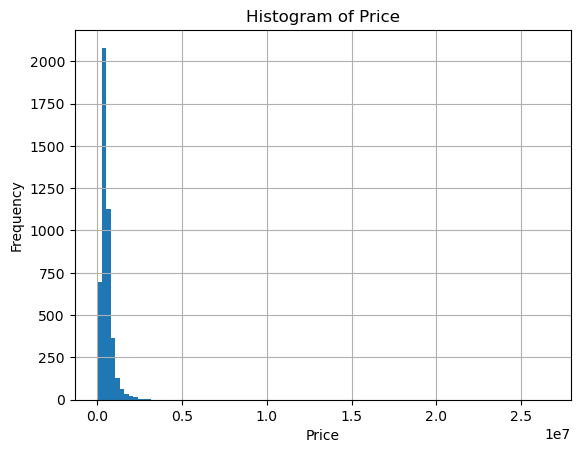

In [21]:
# Distribution of price

hsd['price'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()


In [24]:
# removing rows based on outliers

(hsd['price'] > 0.3e7).sum()
hsd = hsd[~(hsd['price'] > 0.3e7)]

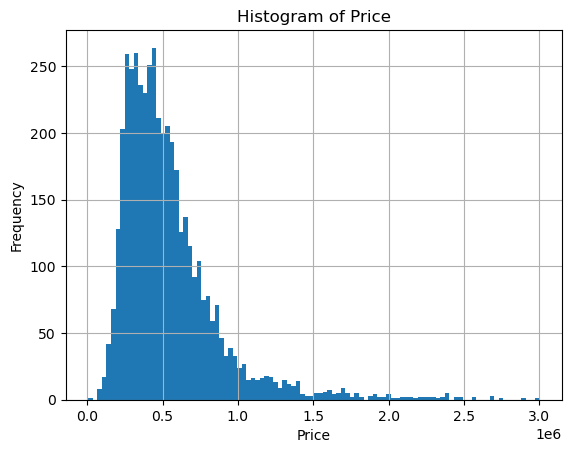

In [25]:
# Distribution of Price after removing outlier

hsd['price'].hist(bins=100)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show()

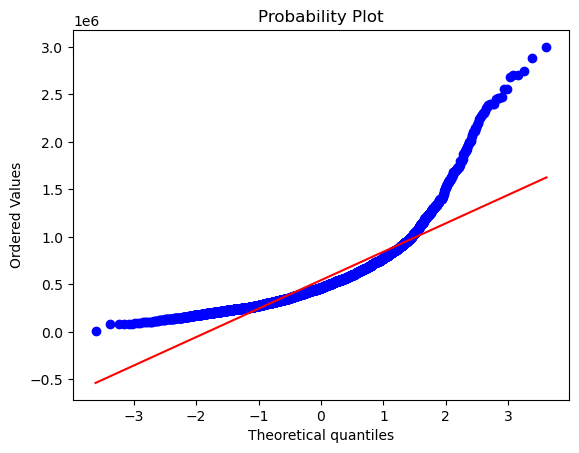

In [34]:
#With the help of Q-Q plot we see whether the terget variable is Normally Distributed or not, as Linear mostly like Normally Distributed Data.
#To get the Q-Q plot:

fig = plt.figure()
res = stats.probplot(hsd['price'], plot=plt)
plt.show()

In [35]:
#As the target variable (price) is very skewed, we apply log-transformation on target varibale to make it Normally Distributed

hsd['price'] = np.log1p(hsd['price'])

C:\Users\TUF\AppData\Local\Temp\ipykernel_28068\1322799442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsd['price'] = np.log1p(hsd['price'])


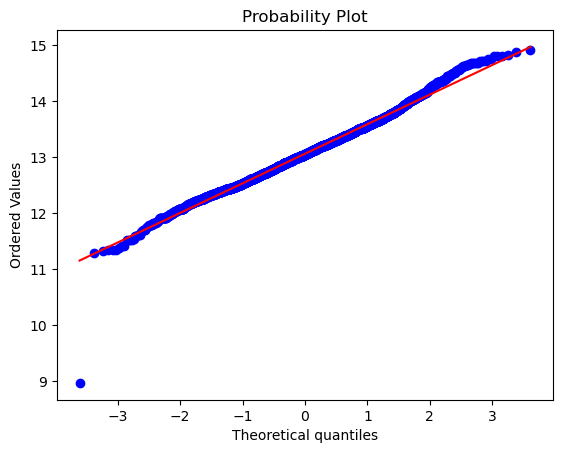

In [37]:
fig = plt.figure()
res = stats.probplot(hsd['price'], plot=plt)
plt.show()

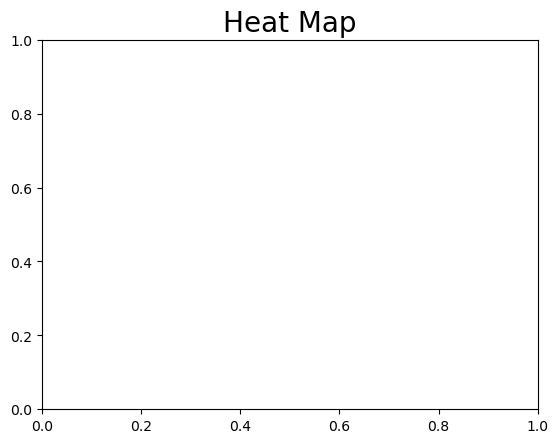

In [39]:
#HeatMap for Correlation

plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [41]:
hsd.columns

Index(['date', 'year', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'age'],
      dtype='object')

In [43]:
#Dropping unnecessary Variables

data = hsd.drop(['date',
                'street',
                'statezip',
                'country',
                'year',
                'city',
                'age'],
                 axis = 1)

In [44]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,12.653962,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005
1,14.684291,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0
2,12.742569,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0
3,12.948012,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0
4,13.217675,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992


In [45]:
data.shape

(4542, 13)

In [46]:
#Splitting train-test sets

x = data.drop("price", axis=1)
y = pd.DataFrame(data["price"])

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [48]:
#Applying StandardScaler on X_Train and X_Test to remove the mean and scale each feature/variable to unit variance

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = x.columns)
X_train.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.683861,0.136259,0.193309,-0.254098,0.986643,-0.07982,-0.300112,0.831332,0.373270,-0.296371,-0.435998,1.196239
1,0.683861,-0.192664,-0.036875,-0.029374,-0.835662,-0.07982,-0.300112,-0.663091,-0.929137,1.639831,-0.705847,1.229981
2,0.683861,0.465183,0.039853,-0.200313,0.986643,-0.07982,-0.300112,-0.663091,0.409448,-0.674710,1.149365,-0.820075
3,0.683861,0.465183,1.135968,-0.201029,0.986643,-0.07982,-0.300112,-0.663091,1.615380,-0.674710,1.183097,-0.820075
4,0.683861,-1.508360,-0.278020,-0.271007,-0.835662,-0.07982,-0.300112,-3.651939,0.059727,-0.674710,-2.358672,-0.820075
5,0.683861,0.465183,0.270037,-0.126038,-0.835662,-0.07982,3.688820,-0.663091,0.204439,0.170988,0.204894,1.228958
6,0.683861,0.136259,-0.321865,-0.174095,-0.835662,-0.07982,-0.300112,0.831332,-0.591476,0.438050,-1.380470,-0.820075
7,-1.539377,-1.508360,-1.396057,-0.307800,-0.835662,-0.07982,2.359176,0.831332,-1.170324,-0.674710,-1.582856,-0.820075
8,-0.427758,-0.521588,-0.453399,-0.169220,-0.835662,-0.07982,-0.300112,-0.663091,-0.700010,0.371284,0.204894,1.228958
9,1.795480,3.096574,1.859403,-0.180594,0.986643,-0.07982,-0.300112,-0.663091,2.411296,-0.674710,1.250559,-0.820075


In [49]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = x.columns)
X_test.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.683861,1.780878,1.804598,-0.263737,0.986643,-0.07982,-0.300112,-0.663091,1.265660,1.328258,1.452946,-0.820075
1,-0.427758,-0.192664,0.445415,-0.252721,-0.835662,-0.07982,-0.300112,0.831332,-0.482942,1.795617,-2.190017,1.214643
2,-0.427758,-0.521588,-0.968573,-0.194887,-0.835662,-0.07982,-0.300112,-0.663091,-0.700010,-0.674710,0.542205,1.224868
3,1.795480,0.465183,0.609833,0.060598,-0.835662,-0.07982,-0.300112,0.831332,-0.229696,1.662086,-1.717781,-0.820075
4,0.683861,-0.192664,0.193309,-0.094726,-0.835662,-0.07982,-0.300112,0.831332,0.578278,-0.674710,-0.537191,1.234070
5,0.683861,0.465183,0.039853,0.635351,0.986643,-0.07982,-0.300112,-0.663091,0.409448,-0.674710,0.677130,-0.820075
6,-0.427758,-0.850512,-0.091681,-0.156883,-0.835662,-0.07982,-0.300112,-0.663091,-0.579417,0.883154,-0.267342,1.233048
7,0.683861,0.465183,1.179812,-0.175747,0.986643,-0.07982,-0.300112,-0.663091,1.663618,-0.674710,1.183097,-0.820075
8,-0.427758,-0.192664,-0.212253,-0.179052,-0.835662,-0.07982,-0.300112,0.831332,-0.362349,0.237753,-0.064955,-0.820075
9,-0.427758,1.451955,-0.530127,-0.355251,2.808947,-0.07982,-0.300112,-0.663091,-0.217637,-0.674710,1.216828,-0.820075


In [50]:
X_train.shape

(3633, 12)

In [70]:
# Linear Regression:

lr = LinearRegression()
lr.fit(X_train, Y_train).score(X_test, Y_test)

0.48225678031504093

In [71]:
Y_pred = lr.predict(X_test)

In [72]:
#rmse:root mean square error

print("rmse : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

rmse :  0.37656441080328046


In [73]:
#Applying One-Hot encoding on City and then reducing Dimension using PCA

from sklearn.decomposition import PCA

X = pd.get_dummies(hsd.city, prefix='City')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
hsd['city_pca1'] = X_pca[:, 0]
hsd['city_pca2'] = X_pca[:, 1]

C:\Users\TUF\AppData\Local\Temp\ipykernel_28068\2746893310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsd['city_pca1'] = X_pca[:, 0]
C:\Users\TUF\AppData\Local\Temp\ipykernel_28068\2746893310.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsd['city_pca2'] = X_pca[:, 1]


C:\Users\TUF\AppData\Local\Temp\ipykernel_28068\1317239081.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hsd.corr(), annot=True)


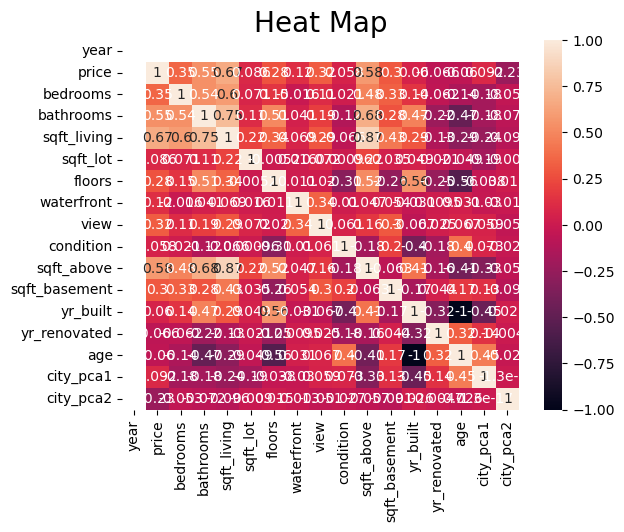

In [74]:
sns.heatmap(hsd.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [82]:
lr.fit(X_train, Y_train)

LinearRegression()

In [83]:
lr.score(X_test, Y_test)

0.48225678031504093

In [84]:
y_pred = lr.predict(X_test)

In [90]:
# Evaluating the model using mean squared error and R2 score

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print('Mean squared error:', mse)
print('R2 score:', r2)

Mean squared error: 0.14180075548362175
R2 score: 0.48225678031504093
